   HASIL SIMULASI MENCAPAI KECEPATAN PUNCAK   
Kecepatan Puncak (Top Speed) : 102.90 km/jam
Waktu Mencapai Top Speed     : 51.70 detik
----------------------------------------------


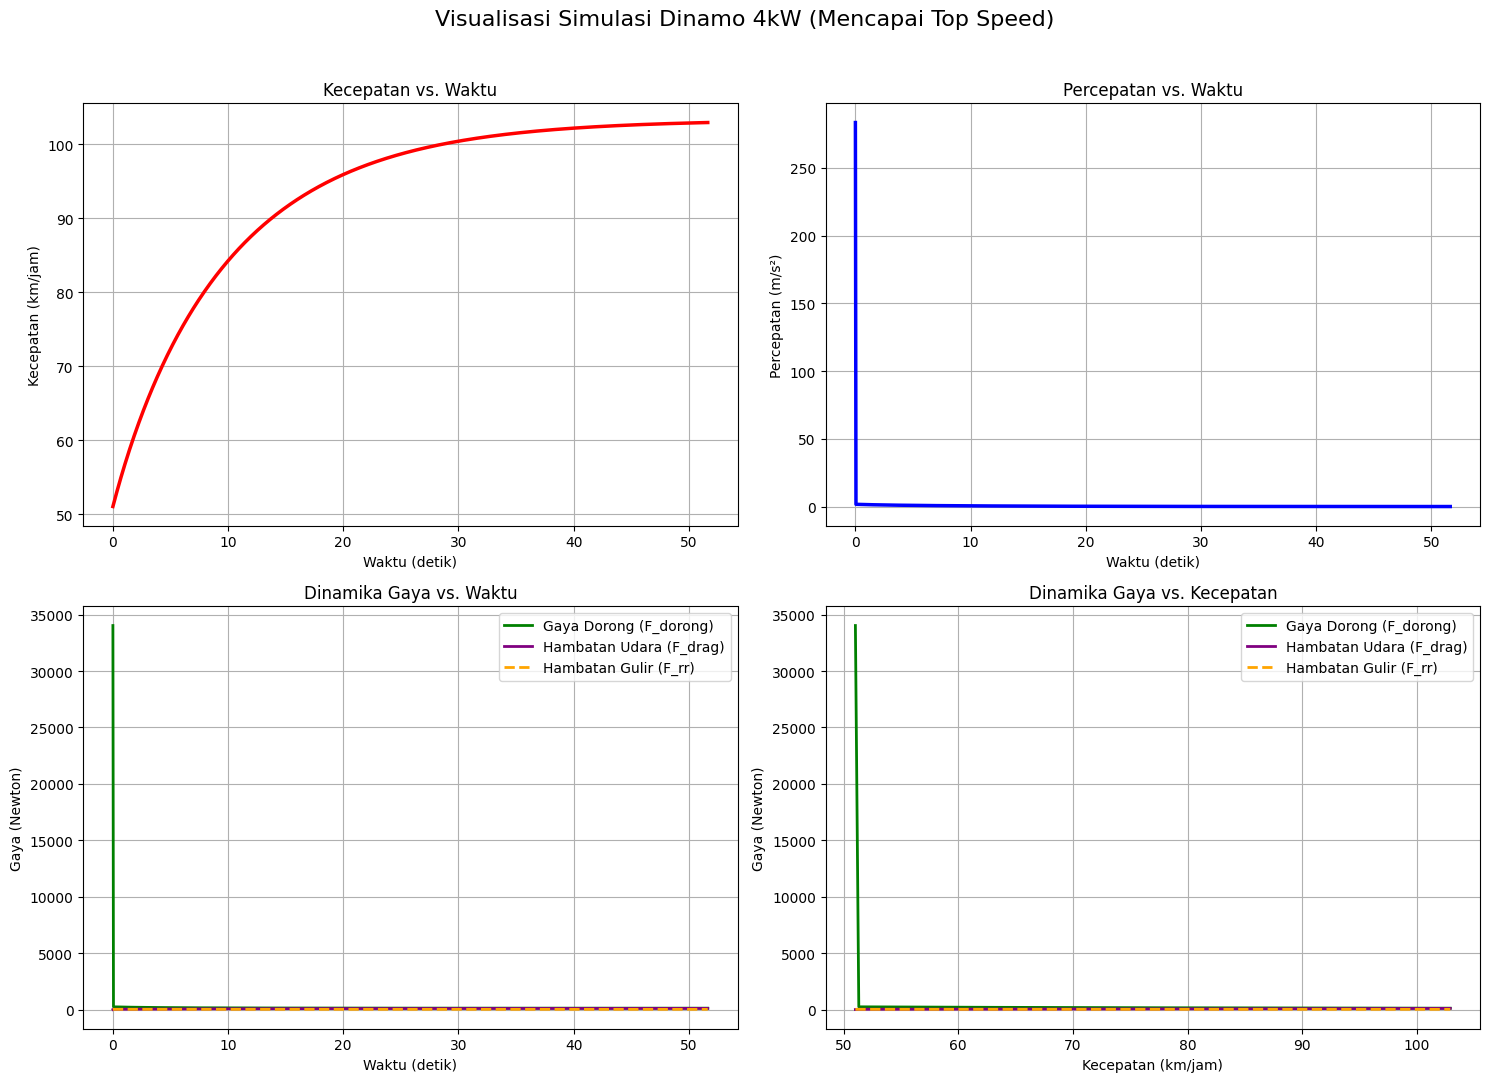

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# SEKSI 1: DEFINISI PARAMETER
# =============================================================================
# Parameter ini konsisten dengan simulasi sebelumnya untuk perbandingan yang adil

# 1.1. Parameter Kendaraan & Lingkungan
m_total = 120.0        # Massa total (kendaraan + pengendara) (kg)
r_roda = 0.264         # Radius roda (m), dari ban 60/80-17
g = 9.81               # Gravitasi (m/s^2)
C_rr = 0.015           # Koefisien hambatan gulir
rho_udara = 1.225      # Kepadatan udara (kg/m^3)
A_frontal = 0.4        # Luas area frontal (m^2)
C_d = 0.5              # Koefisien drag

# 1.2. Parameter Motor & Drivetrain
P_motor_watt = 4000.0  # Daya nominal motor (W)
G_rasio = 37.0 / 14.0  # Rasio gir (belakang/depan)
eff_total = 0.85       # Efisiensi total sistem

# 1.3. Parameter Simulasi
dt = 0.05              # Interval waktu simulasi (detik)

# =============================================================================
# SEKSI 2: INISIALISASI VARIABEL
# =============================================================================
t = 0.0                # Waktu
v_ms = 0.0             # Kecepatan dalam m/s
a = 0.0                # Percepatan awal

# List untuk menyimpan data hasil simulasi untuk plotting
t_list, v_kph_list, a_list = [], [], []
F_dorong_list, F_drag_list, F_rr_list = [], [], []

# =============================================================================
# SEKSI 3: LOOP SIMULASI HINGGA TOP SPEED
# =============================================================================
# Loop akan berhenti ketika percepatan mendekati nol

while True:
    # 3.1. Hitung Gaya Hambatan (Resistive Forces)
    F_rolling = C_rr * m_total * g
    F_drag = 0.5 * rho_udara * A_frontal * C_d * (v_ms**2)
    F_resist = F_rolling + F_drag

    # 3.2. Hitung Gaya Dorong (Tractive Force)
    # Daya mekanik yang keluar dari motor
    P_mekanik = P_motor_watt * eff_total
    
    # Gaya dorong di roda, dihitung dari daya. F = P / v
    # Hindari pembagian dengan nol saat start
    if v_ms < 0.1:
        # Asumsikan torsi start awal yang tinggi untuk memulai gerakan
        # Ini adalah penyederhanaan, namun efektif untuk model berbasis daya
        F_dorong = (P_mekanik / 1.0) * G_rasio / r_roda
    else:
        # Gaya dorong di roda setelah bergerak
        F_dorong_di_motor = P_mekanik / (v_ms * G_rasio / r_roda)
        F_dorong = (F_dorong_di_motor * G_rasio) / r_roda

    # 3.3. Hitung Dinamika Kendaraan
    F_net = F_dorong - F_resist
    a = F_net / m_total
    
    # Hentikan loop jika percepatan sangat kecil (mencapai top speed)
    # atau jika kendaraan mulai melambat (gaya hambat > gaya dorong)
    if a < 0.01:
        break
        
    # Update kecepatan
    v_ms += a * dt
    
    # 3.4. Simpan data untuk plotting
    t_list.append(t)
    a_list.append(a)
    v_kph_list.append(v_ms * 3.6) # Konversi ke km/jam
    F_dorong_list.append(F_dorong)
    F_drag_list.append(F_drag)
    F_rr_list.append(F_rolling) # F_rr konstan
    
    # Increment waktu
    t += dt
    
    # Pengaman agar loop tidak berjalan selamanya jika ada error
    if t > 200:
        print("Simulasi dihentikan karena melebihi batas waktu.")
        break

# =============================================================================
# SEKSI 4: TAMPILAN HASIL DAN VISUALISASI GRAFIK
# =============================================================================

# 4.1. Cetak Hasil Akhir
print("==============================================")
print("   HASIL SIMULASI MENCAPAI KECEPATAN PUNCAK   ")
print("==============================================")
print(f"Kecepatan Puncak (Top Speed) : {max(v_kph_list):.2f} km/jam")
print(f"Waktu Mencapai Top Speed     : {t:.2f} detik")
print("----------------------------------------------")

# 4.2. Konfigurasi Plot
fig, axs = plt.subplots(2, 2, figsize=(15, 11))
fig.suptitle('Visualisasi Simulasi Dinamo 4kW (Mencapai Top Speed)', fontsize=16)

# Grafik 1: Kecepatan vs. Waktu
axs[0, 0].plot(t_list, v_kph_list, color='red', linewidth=2.5)
axs[0, 0].set_title('Kecepatan vs. Waktu', fontsize=12)
axs[0, 0].set_xlabel('Waktu (detik)')
axs[0, 0].set_ylabel('Kecepatan (km/jam)')
axs[0, 0].grid(True)

# Grafik 2: Percepatan vs. Waktu
axs[0, 1].plot(t_list, a_list, color='blue', linewidth=2.5)
axs[0, 1].set_title('Percepatan vs. Waktu', fontsize=12)
axs[0, 1].set_xlabel('Waktu (detik)')
axs[0, 1].set_ylabel('Percepatan (m/s²)')
axs[0, 1].grid(True)

# Grafik 3: Gaya-gaya vs. Waktu
axs[1, 0].plot(t_list, F_dorong_list, label='Gaya Dorong (F_dorong)', color='green', linewidth=2)
axs[1, 0].plot(t_list, F_drag_list, label='Hambatan Udara (F_drag)', color='purple', linewidth=2)
axs[1, 0].plot(t_list, F_rr_list, label='Hambatan Gulir (F_rr)', color='orange', linestyle='--', linewidth=2)
axs[1, 0].set_title('Dinamika Gaya vs. Waktu', fontsize=12)
axs[1, 0].set_xlabel('Waktu (detik)')
axs[1, 0].set_ylabel('Gaya (Newton)')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Grafik 4: Gaya vs. Kecepatan (untuk melihat titik ekuilibrium)
axs[1, 1].plot(v_kph_list, F_dorong_list, label='Gaya Dorong (F_dorong)', color='green', linewidth=2)
axs[1, 1].plot(v_kph_list, F_drag_list, label='Hambatan Udara (F_drag)', color='purple', linewidth=2)
axs[1, 1].plot(v_kph_list, F_rr_list, label='Hambatan Gulir (F_rr)', color='orange', linestyle='--', linewidth=2)
axs[1, 1].set_title('Dinamika Gaya vs. Kecepatan', fontsize=12)
axs[1, 1].set_xlabel('Kecepatan (km/jam)')
axs[1, 1].set_ylabel('Gaya (Newton)')
axs[1, 1].legend()
axs[1, 1].grid(True)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
